# Importing  Libraries #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Exploration #

In [2]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df=df.drop(['customer_id'],axis=1)

# EDA & Insights #

Text(0, 0.5, 'products_number')

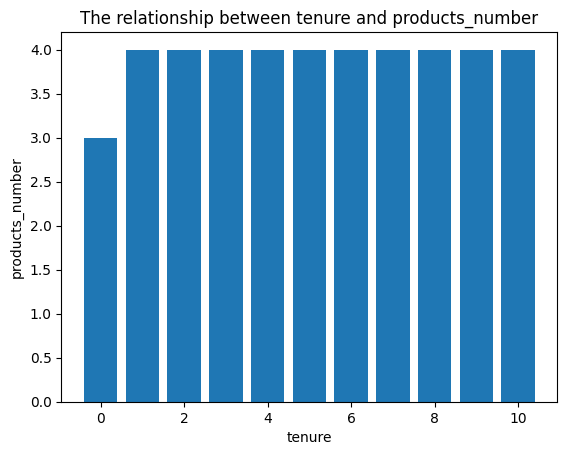

In [7]:
#whatever the products_number decrease or increase still exist problem delay
plt.bar(df['tenure'],df['products_number'])
plt.title('The relationship between tenure and products_number')
plt.xlabel('tenure')
plt.ylabel('products_number')

Text(0, 0.5, 'counts')

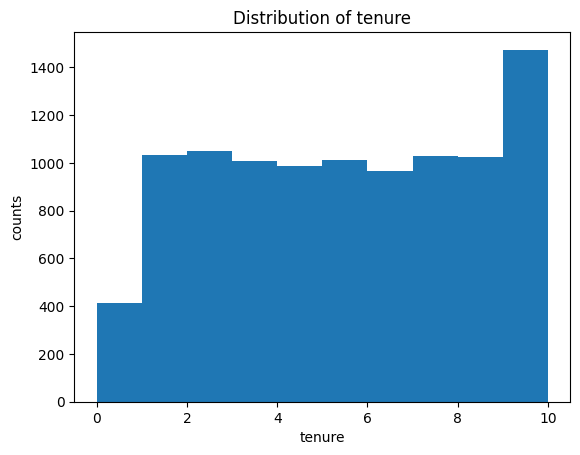

In [8]:
plt.hist(df['tenure'])
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('counts')
#problem tenure solves this problem by increase services

In [9]:
counts_c=df['country'].value_counts()
counts_c

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

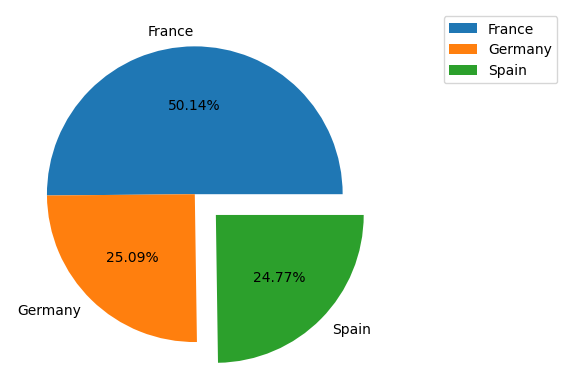

In [10]:
plt.pie(counts_c,labels=counts_c.index,autopct='%0.2f%%',explode=[0,0,.2])
plt.legend(bbox_to_anchor=(1.5,1))

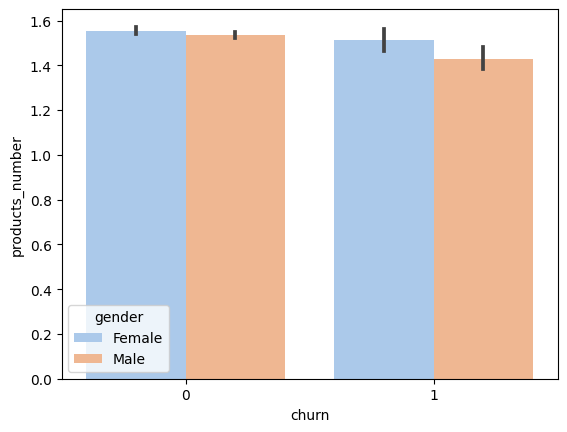

In [11]:
sns.set_palette("pastel")
sns.barplot(x='churn', y='products_number', hue='gender', data=df)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


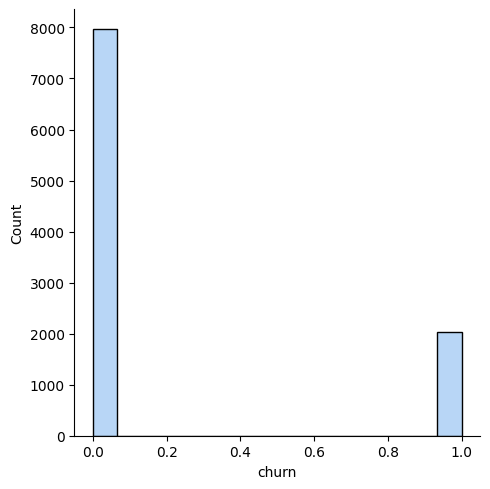

In [12]:
sns.displot(df['churn'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


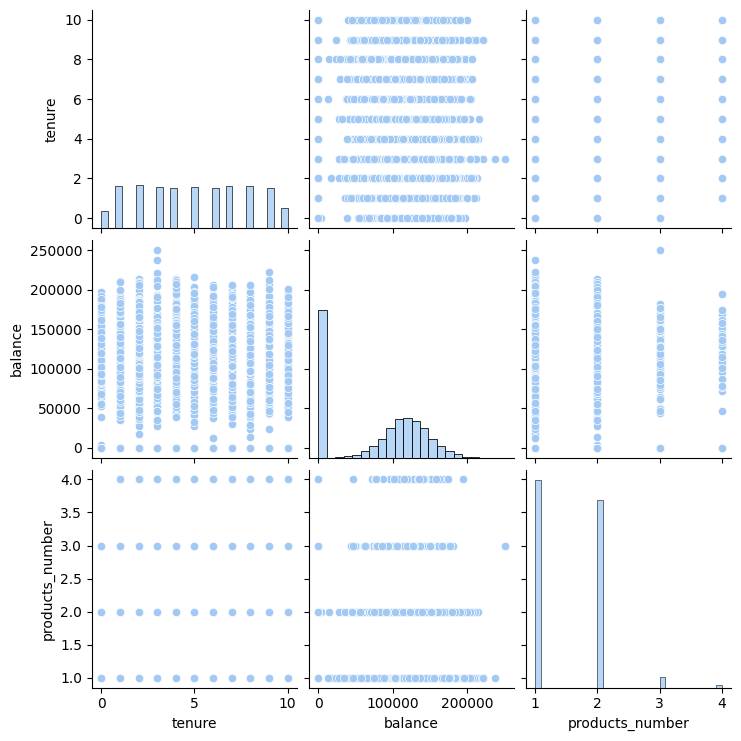

In [13]:
sns.pairplot(df[['tenure', 'balance', 'products_number']], hue=None)


In [14]:
numeric_columns=df.select_dtypes(include=['number']).columns
numeric_columns

Index(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'credit_score'),
  Text(1, 0, 'age'),
  Text(2, 0, 'tenure'),
  Text(3, 0, 'balance'),
  Text(4, 0, 'products_number'),
  Text(5, 0, 'credit_card'),
  Text(6, 0, 'active_member'),
  Text(7, 0, 'estimated_salary'),
  Text(8, 0, 'churn')])

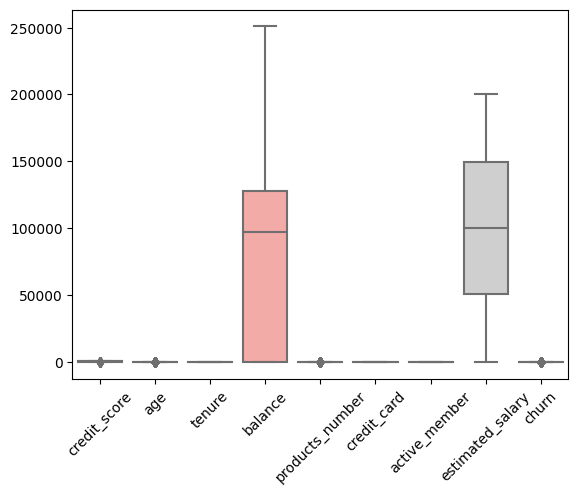

In [15]:
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)

<Axes: >

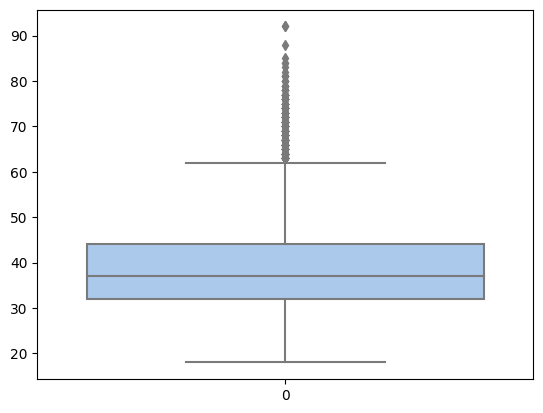

In [16]:
sns.boxplot(df['age'])

<Axes: >

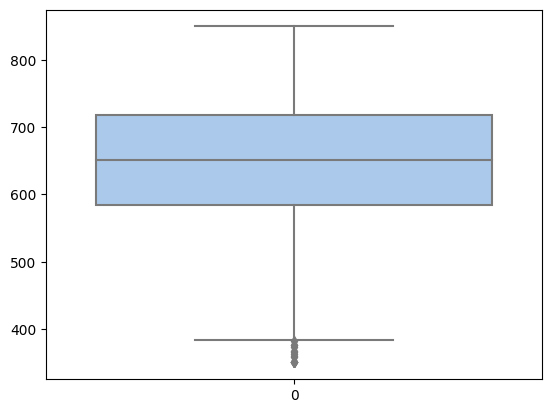

In [17]:
sns.boxplot(df['credit_score'])

<Axes: >

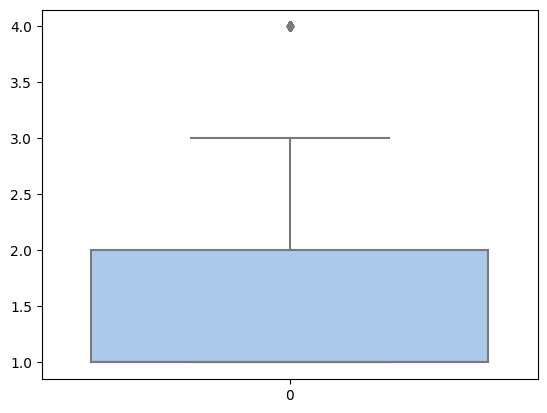

In [18]:
sns.boxplot(df['products_number'])

# Preprocessing #

In [19]:
#chexk duplicated
df.duplicated().sum()

0

# Remove Outliers #

In [20]:
#Handaling outlier
def outliers_handler(real_data:pd.DataFrame(),col_name:str)->pd.DataFrame():
    data=real_data.copy()
    q1 = np.percentile(data[col_name],25)
    q3 = np.percentile(data[col_name],75)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outliers = (data[col_name]>upper_bound) | (data[col_name]<lower_bound)
    num_of_outliers = len(data[outliers])
    if num_of_outliers <= len(data)*0.1:
        data = data[~outliers]
        print("Outliers dropped")
    else:
        data.loc[data[col_name]>upper_bound,col_name] = upper_bound
        data.loc[data[col_name]<lower_bound,col_name] = lower_bound
        print("Outliers replaced")
    return data
for i in numeric_columns:
    if i=='churn':
        break
    df=outliers_handler(df,i)

Outliers dropped
Outliers dropped
Outliers dropped
Outliers dropped
Outliers dropped
Outliers dropped
Outliers dropped
Outliers dropped


In [21]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding Catgorical columns

In [22]:
catgorical_columns=df.select_dtypes(include=['object']).columns
catgorical_columns

Index(['country', 'gender'], dtype='object')

In [23]:
lb=LabelEncoder()
for col in catgorical_columns:
    df[col]=lb.fit_transform(df[col])
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Balancing Data #

In [24]:
x =df.drop(columns=['churn'])  
y=df['churn']

In [25]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
x,y = resampler.fit_resample(x,y)

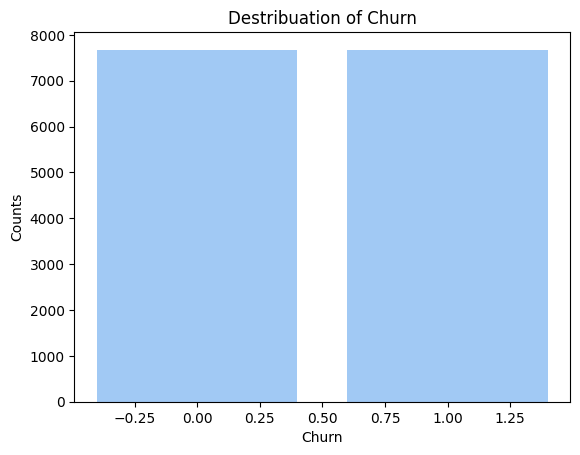

In [26]:
counts=y.value_counts()
plt.bar(counts.index,counts.values)
plt.title('Destribuation of Churn')
plt.xlabel('Churn')
plt.ylabel('Counts')
plt.show()

# split the data #

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<Axes: >

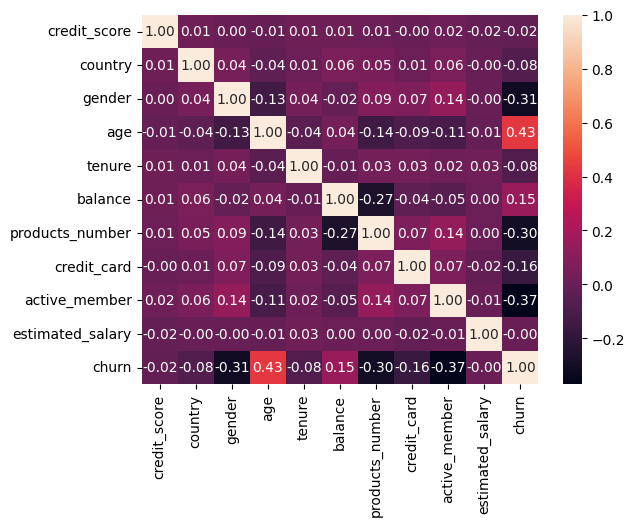

In [28]:
combined = pd.concat([x_train,y_train], axis=1)

correlation_matrix = combined.corr() 
sns.heatmap(correlation_matrix,annot=True,fmt='.2f')

# scaling #

In [29]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [30]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.show()

# Modeling #

In [31]:
LR= LogisticRegression()

# Train the model
LR.fit(x_train, y_train)

# Make predictions
y_pred_LR = LR.predict(x_test)

Accuracy: 0.7981113643764246
Precision: 0.7825242718446602
Recall: 0.8097789685197588
ROC AUC: 0.7984256059328831


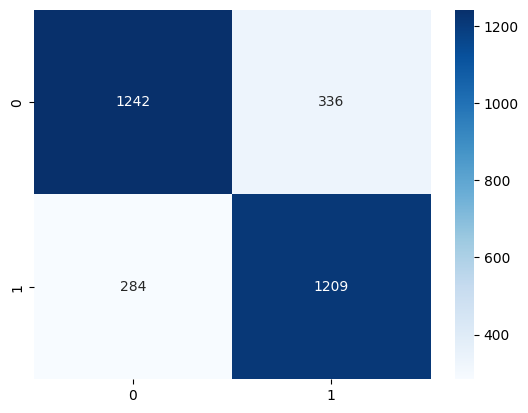

In [32]:
evaluate_model(y_test,y_pred_LR)

In [33]:
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(x_train, y_train)

# Make predictions
y_pred_dt = dt.predict(x_test)

Accuracy: 0.7880169325952459
Precision: 0.7748041775456919
Recall: 0.7950435365036839
ROC AUC: 0.7882061788982297


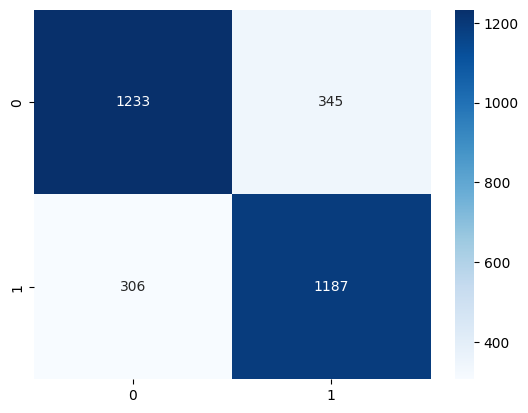

In [34]:
#Evaluate the model
evaluate_model(y_test,y_pred_dt)

In [35]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF.fit(x_train, y_train)

# Make predictions
y_pred_rf = RF.predict(x_test)

Accuracy: 0.8655161185281667
Precision: 0.8552631578947368
Recall: 0.87073007367716
ROC AUC: 0.8656565450768563


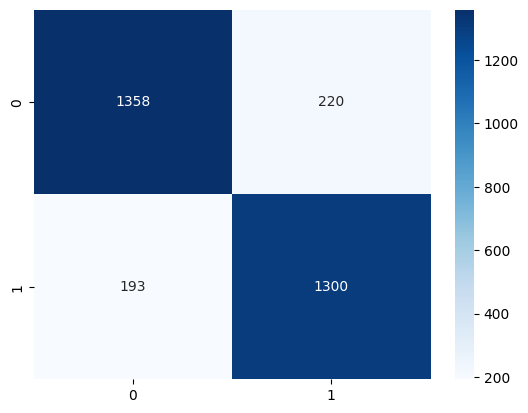

In [36]:
evaluate_model(y_test,y_pred_rf)